In [1]:
# Dataset for clustering -> online shoppers intention
# Dataset for text-mining -> bbc
import pandas as pd
rs = 42

In [2]:
!ls

 bbc.csv	      online_shoppers_intention.csv   web_log_data.csv
 IFN645.ipynb	      text-files-to-mine
'online retail.csv'   text-files-to-mine.zip


In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.dropna(inplace= True)

In [5]:
len(df)

12316

In [6]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
import numpy as np

In [8]:

# We should have 10 numerical and 9 categorial features

## Therefore, the first 10 is numerical, others are categorial
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

# Clustering

Attribute Information: The following six attributes, "Administrative", "Administrative
Duration", "Informational", "Informational Duration", "Product Related" and "Product
Related Duration", represent the number of different types of pages visited by the visitor
in a session and the total time spent in each of these page categories.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

Task 1. Data Preparation for Clustering.
    1. Can you identify data quality issues in this dataset such as unusual data types,
    missing values, etc?
    2. What variables did you include in the analysis and what were their roles and
    measurement level set? Justify your choice. Answer this question for each of the
    tasks 2 and 3.

In [10]:
def seperateDfToNumAndCat(df):
    Cat = []
    Num = []
    for colName in df.columns:
        if (df[colName].dtype == np.float):
            Num.append(colName)
        else:
            Cat.append(colName)
            
    return {
        'Cat':Cat,
        'Num':Num
    }
seperateDfToNumAndCat(df)

{'Cat': ['Month',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'VisitorType',
  'Weekend',
  'Revenue'],
 'Num': ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay']}

In [11]:
df['Revenue'].dtype == np.float

False

In [12]:
# Null values are found 

def printNullValueCol(df):
    return [colName for colName in df.columns if(df[colName].isnull().sum() > 0)]
            
print('Columns contain NULL: \n',printNullValueCol(df))    

Columns contain NULL: 
 []


In [13]:
# replaced_vals = ['?', '#VALUE!']
def printColumnInfo(df):
    
    '''
    Display the information of this Dataframe
    '''
    
    for colName in df.columns:
        print("======================= " + str(colName) + " =======================")
        print("----------------------- FIRST FIVE -----------------------")
        print(df[colName][:5])
        print("----------------------- DESCIRBE -----------------------")
        print(df[colName].describe())
        print("----------------------- COUNTS -----------------------")
        commonList = list(df[colName].value_counts().keys())
        if len(commonList) > 100:
            print("Five Most Common: ", commonList[:5])
        else:
            print("Count List: \n", df[colName].value_counts())
        print("Num of NULL: ", df[colName].isnull().sum())
#         for rep in replaced_vals:
#             print("Number of "+str(rep)+" : " + str(len(df[df[colName] == rep])))
printColumnInfo(df)

======================= Administrative =======================
----------------------- FIRST FIVE -----------------------
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Administrative, dtype: float64
----------------------- DESCIRBE -----------------------
count    12316.000000
mean         2.317798
std          3.322754
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
----------------------- COUNTS -----------------------
Count List: 
 0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
Num of NULL:  0
======================= Administrative_Duration =======

In [14]:
seperateDfToNumAndCat(df)

{'Cat': ['Month',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'VisitorType',
  'Weekend',
  'Revenue'],
 'Num': ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay']}

In [15]:
# first strategy -> replacing the null value by the mean


## As we known from above the columns that contain null are numerical columns. therefore, 
## the NULL value should be replace by the mean


from copy import deepcopy

def preprocessTheNullValue(df_input, colTypes):
    df = deepcopy(df_input)
    for colName in df.columns:
        ## Dealing with the Numerical first
        if (colName in colTypes['Num']):
            df[colName] = df[colName].astype('float')
            if (df[colName].isnull().sum() > 0):
                df[colName] = df[colName].fillna(df[colName].mean())
        
        ## Dealing with the Categorial
        
        elif (colName in colTypes['Cat']):
            df[colName] = df[colName].astype('category')
            if (df[colName].isnull().sum() > 0):
                df[colName] = df[colName].fillna(df[colName].describe()['top'])

    return df

preprocessed_df = preprocessTheNullValue(df, seperateDfToNumAndCat(df))

#### After the preprocessing 

In [16]:
df.isnull().sum().sum() # If we don't need to use this df, we can delete it latter

0

In [17]:
preprocessed_df.isnull().sum().sum()

0

In [18]:
def plotAllCols (df):
    for colName in df.columns:
        plt.figure(figsize=(20,10))
        if colName in categorial_cols:
            ### if it's categorial column, plot hist diagram 
            sns.countplot(x=colName, data = df, hue="IsBadBuy")
        elif colName in interval_cols:
            ### if it's interval column, plot box diagram
            sns.boxplot(x="IsBadBuy", y=colName, data = df )

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def plotingAllCols(df, colTypes):
    
    for colName in df.columns:
        print('===================',colName,'===================')
        if (colName in colTypes['Num']):
            sns.distplot(df[colName])
        elif (colName in colTypes['Cat']):
            sns.countplot(df[colName])
        else:
            raise ValueError
        plt.show()

=================== Administrative ===================


/home/chihcheng/python3env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


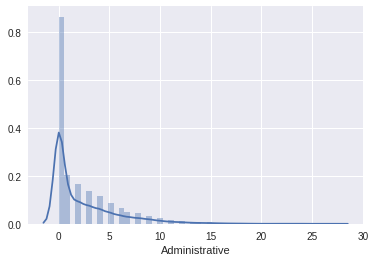

=================== Administrative_Duration ===================


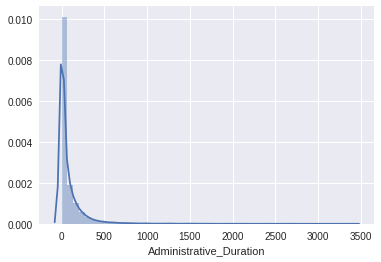

=================== Informational ===================


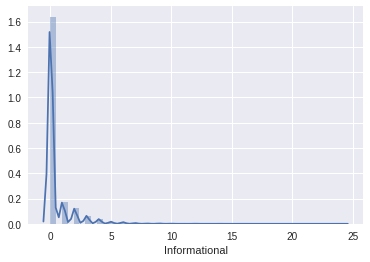

=================== Informational_Duration ===================


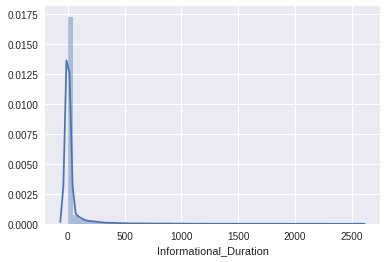

=================== ProductRelated ===================


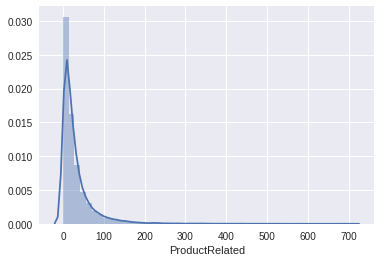

=================== ProductRelated_Duration ===================


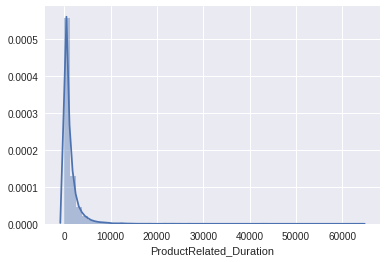

=================== BounceRates ===================


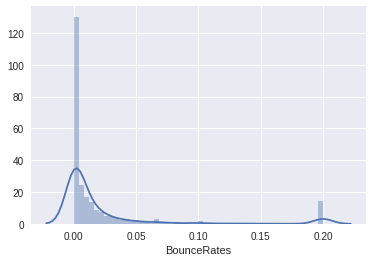

=================== ExitRates ===================


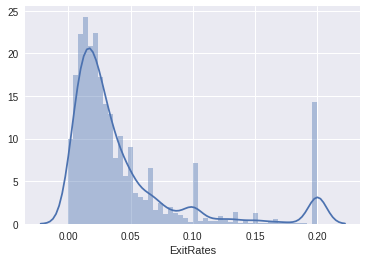

=================== PageValues ===================


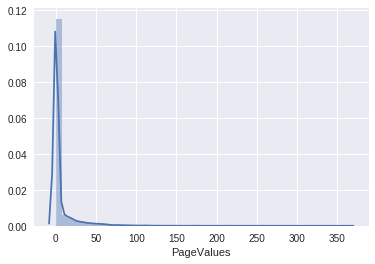

=================== SpecialDay ===================


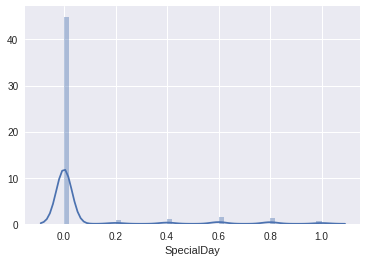

=================== Month ===================


/home/chihcheng/python3env/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


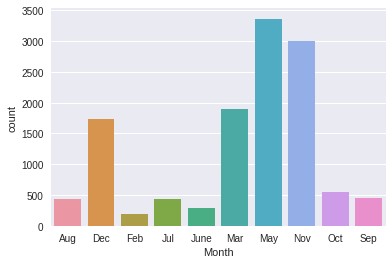

=================== OperatingSystems ===================


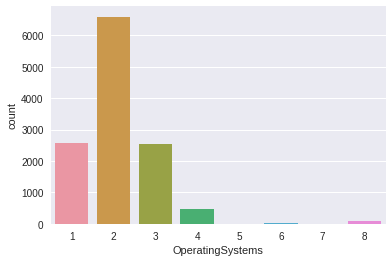

=================== Browser ===================


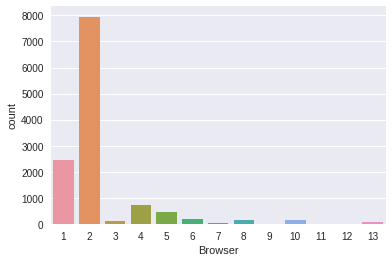

=================== Region ===================


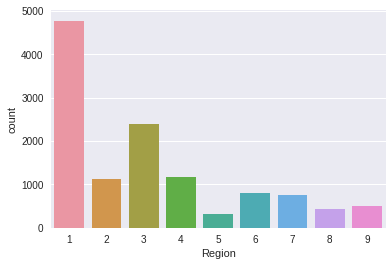

=================== TrafficType ===================


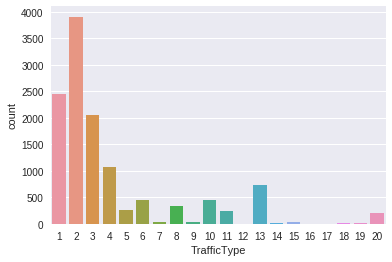

=================== VisitorType ===================


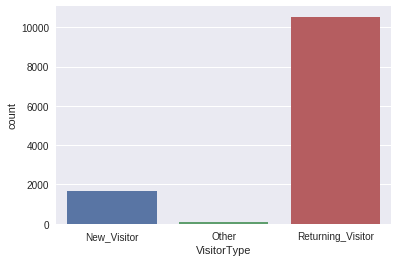

=================== Weekend ===================


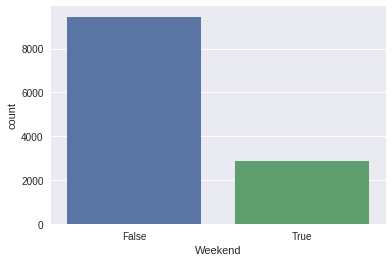

=================== Revenue ===================


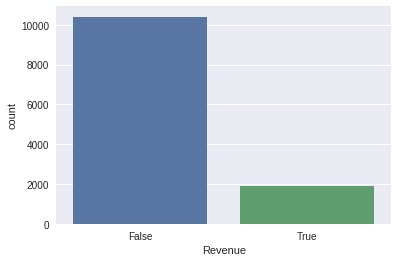

In [21]:
plotingAllCols(preprocessed_df, seperateDfToNumAndCat(df))

In [22]:
### Use the cetroid distance for measuring the cluster performance

In [23]:
# from sklearn.preprocessing import StandardScaler

# # take 3 variables and drop the rest
# df2 = df[['MedHHInc', 'MeanHHSz', 'RegDens']]

# # convert df2 to matrix
# X = df2.as_matrix()

# # scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [24]:
### How can we dealing with the negative value in these 3 cols? since the duration shouldn't be -1

In [25]:
# What variables did you include in the analysis and what were their roles and
# measurement level set? Justify your choice. Answer this question for each of the
# tasks 2 and 3.

'''
Since the first task want to cluster the customers based on the time they spend on the website. So we only contain
the features that related to time spending on different types of page.

'''
# taskOneIncludingCols= ['Administrative',
#   'Administrative_Duration',
#   'Informational',
#   'Informational_Duration',
#   'ProductRelated',
#   'ProductRelated_Duration',]

taskOneIncludingCols= [
  'Administrative_Duration',
  'Informational_Duration',
  'ProductRelated_Duration',]


taskOneDf = preprocessed_df[taskOneIncludingCols]

In [26]:
from sklearn.cluster import KMeans

In [27]:
model = KMeans(n_clusters=3, random_state=rs)
model.fit(taskOneDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [28]:
model.cluster_centers_

array([[   62.11865148,    20.01096498,   579.1148995 ],
       [  295.64170854,   269.29600271, 10922.77134265],
       [  155.55802504,    84.88987994,  3368.09846319]])

In [29]:
#Task2.1 for determining the number of the clusters
#
from sklearn.metrics import silhouette_score

In [57]:
def ElbowEffectAndSilhouetteScore(data, kRunRange):
    clusters = []
    inertial_vals = []
    silhouette_scores = []
    
    for i in kRunRange:
        model = KMeans(n_clusters=i, random_state=rs, n_jobs=10)
        model.fit(data)
        clusters.append(model)
        inertial_vals.append(model.inertia_)
        silhouette_scores.append(silhouette_score(data, model.predict(data)))
    
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(kRunRange, inertial_vals, marker='o', label='Inertial_vals')
    plt.xlabel('Inertial_vals', fontsize=22)
    plt.ylabel('Number of clusters', fontsize=22)    
    
    plt.subplot(212)
    plt.plot(kRunRange, silhouette_scores, marker='o', label="silhouette_scores")
    plt.xlabel('Silhouette_scores', fontsize=22)
    plt.ylabel('Number of clusters', fontsize=22)
    
    plt.tight_layout()
    plt.show()
    
    return clusters

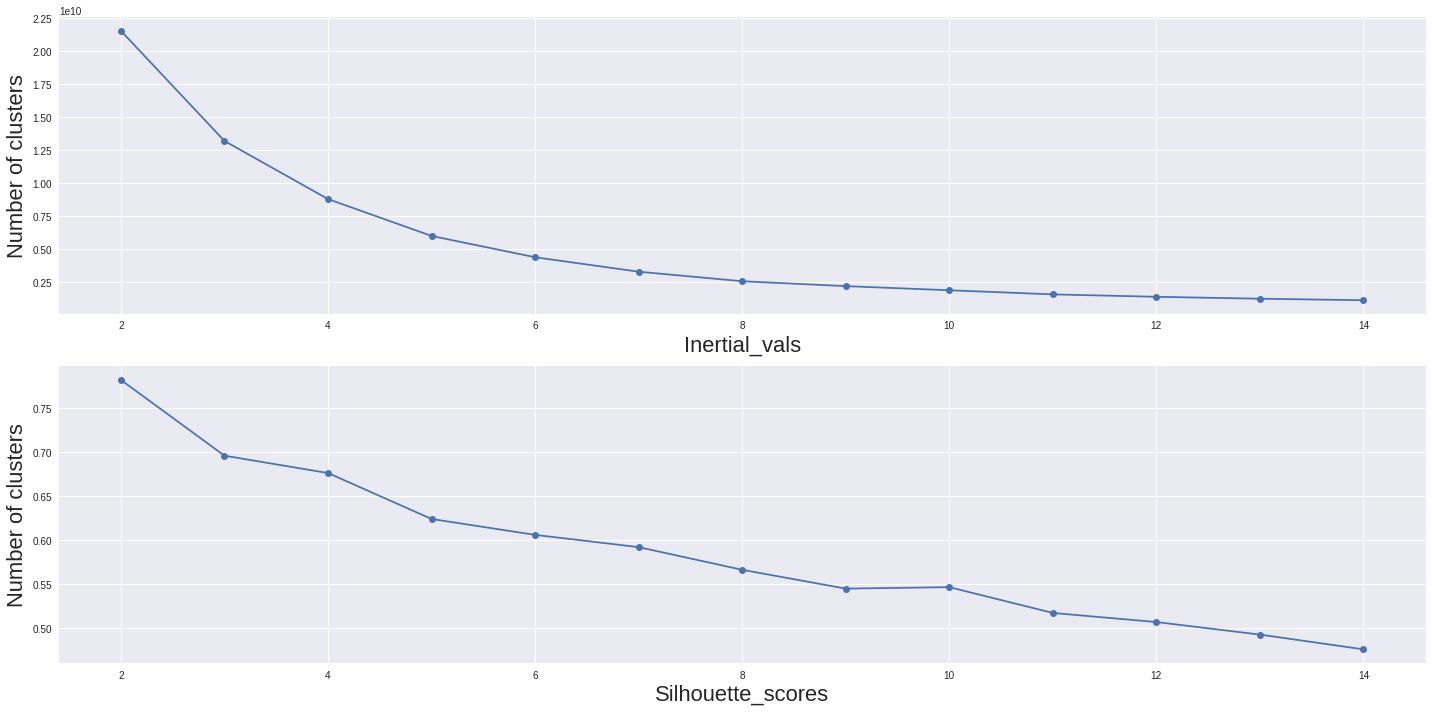

In [58]:
clusters = ElbowEffectAndSilhouetteScore(taskOneDf, range(2,15,1))

From the plot of Elbow Effect we can find the k=3 or k=4 may be the best option of number of clusters. Then we have a look of the silhouette scores, we found out the k=3 has a slightly higher score. Therefore, we determine the number of clusters is 3.


b. For the model with the optimal number of clusters, list the variables that
were found important in determining the clusters?  

Q: What's the vraibles mean? the features or the inertial_vals and silhouette_scores?

In [70]:
def calculateFeatureDifference(centers):
    
    numClusters, numFeatures = centers.shape
    
    dif = []
    
    for i in range(numFeatures):
        feature_dif = 0
        for j in range(numClusters):
            for k in range(j+1, numClusters):
                feature_dif+= abs(centers[j, i] - centers[k,i])
        dif.append(feature_dif)
        
    return dif

In [71]:
calculateFeatureDifference(clusters[1].cluster_centers_)

# From this we can know the the feature 3 has the largest distance between 3 centres

[467.06083744555457, 498.63232855906404, 20689.240016684784]

In [69]:
list(range(5,6))

[5]

In [67]:
clusters[1].cluster_centers_.shape

(3, 3)

We found the ProductRelated_Duration is the most informative feature in this cluster model since it can appropriately seperate the three different cluster.

c. Explain the cluster results. Q: show I use the plot to explain?

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

Cluster_1 (Blue): This cluster consist of the most of the observations. Number of objects in this cluster is 10138. This cluster has a Informational_Duration. And, the feature of this cluter is the least ProductRelated_Duration. The Administrative_Duration feature in this cluster is compact, most of the instances are in the range of 0 to 2000.


Cluster_2 (Green): This cluster is the second large group, which has 1973 objects. It has the wider range that Cluster_1 in Administrative_Duration. However, most of the objects is still in the range of 0 to 2000. In terms of the Informational_Duration, this cluster has the least value and samllest range. Moreover, this cluster also has a small value of ProductRelated_Duration but slightly larger than Cluster_1.


Cluster_3 (Red): This cluster has the smallest group, which consist of only 205 objects. This cluster has the widest range and highest value in all the three features. In the Administrative_Duration, even this cluster has the widest range, most of the instances exist in the range of 0 to 1500.



In [ ]:
taskOneIncludingCols= [
  'Administrative_Duration',
  'Informational_Duration',
  'ProductRelated_Duration',]


Best Model Clusters k = 3
Value counts: 
 0    10138
1     1973
2      205
Name: Cluster_ID, dtype: int64


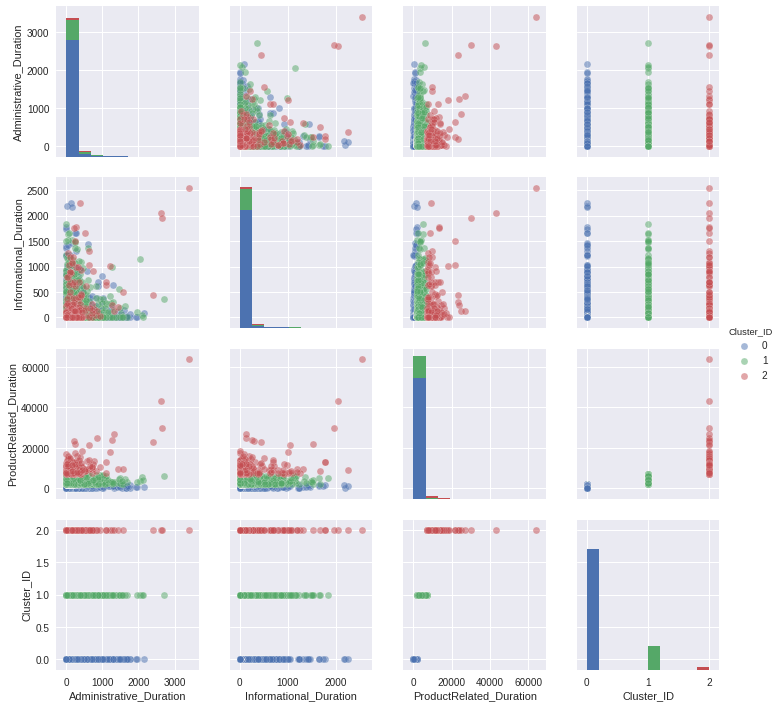

In [56]:
print("Best Model Clusters k =",clusters[1].n_clusters)

# TODO: have to take another visualization method
taskOneDfWithID = deepcopy(taskOneDf)
taskOneDfWithID['Cluster_ID'] = clusters[1].predict(taskOneDf)
print('Value counts: \n',taskOneDfWithID['Cluster_ID'].value_counts())
sns.pairplot(taskOneDfWithID, hue='Cluster_ID', plot_kws={'alpha':0.5})

2. What is the effect of using the standardization method on the model above? Does
the variable normalization process enable a better clustering solution

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

taskOneDfStandardized = scaler.fit_transform(taskOneDf)

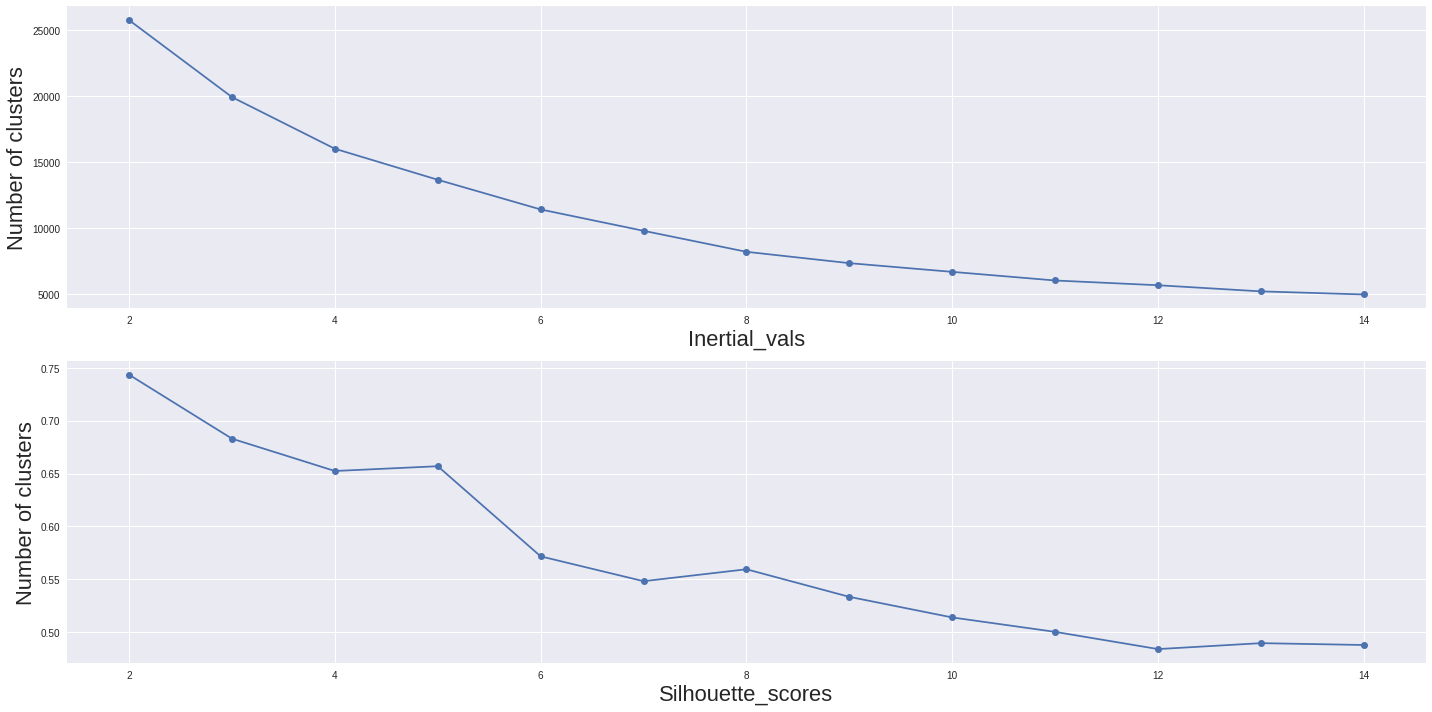

In [72]:
clustersStandardised = ElbowEffectAndSilhouetteScore(taskOneDfStandardized, range(2,15,1))

In [36]:
## Q: How can I know which one is better?

A: if we just measuring the the goodness from the Elbow Effect, we can find that the stadardised clusters have more gradual decline curve than the original one, which means the number of clusters doesn't have a strong impact as the original model. Moreover, the silhouette scores also show the k=4 and k=6 have similar values in the standardised model. These factors may affect the decision of k.

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

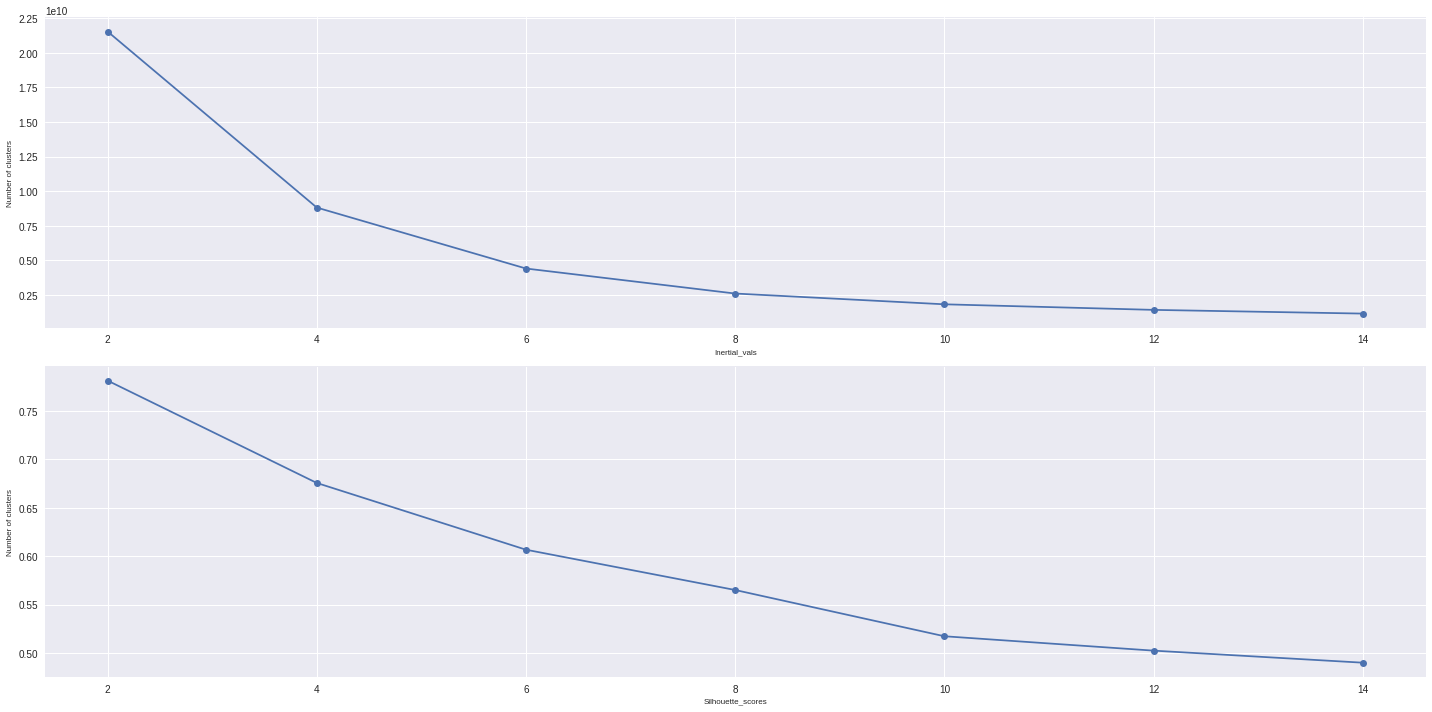

In [37]:
clustersAllInfo = ElbowEffectAndSilhouetteScore(pd.get_dummies(preprocessed_df),  range(2,15,2))

In [38]:
scaler = StandardScaler()

preprocessed_df_standardised = scaler.fit_transform(pd.get_dummies(preprocessed_df))

/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


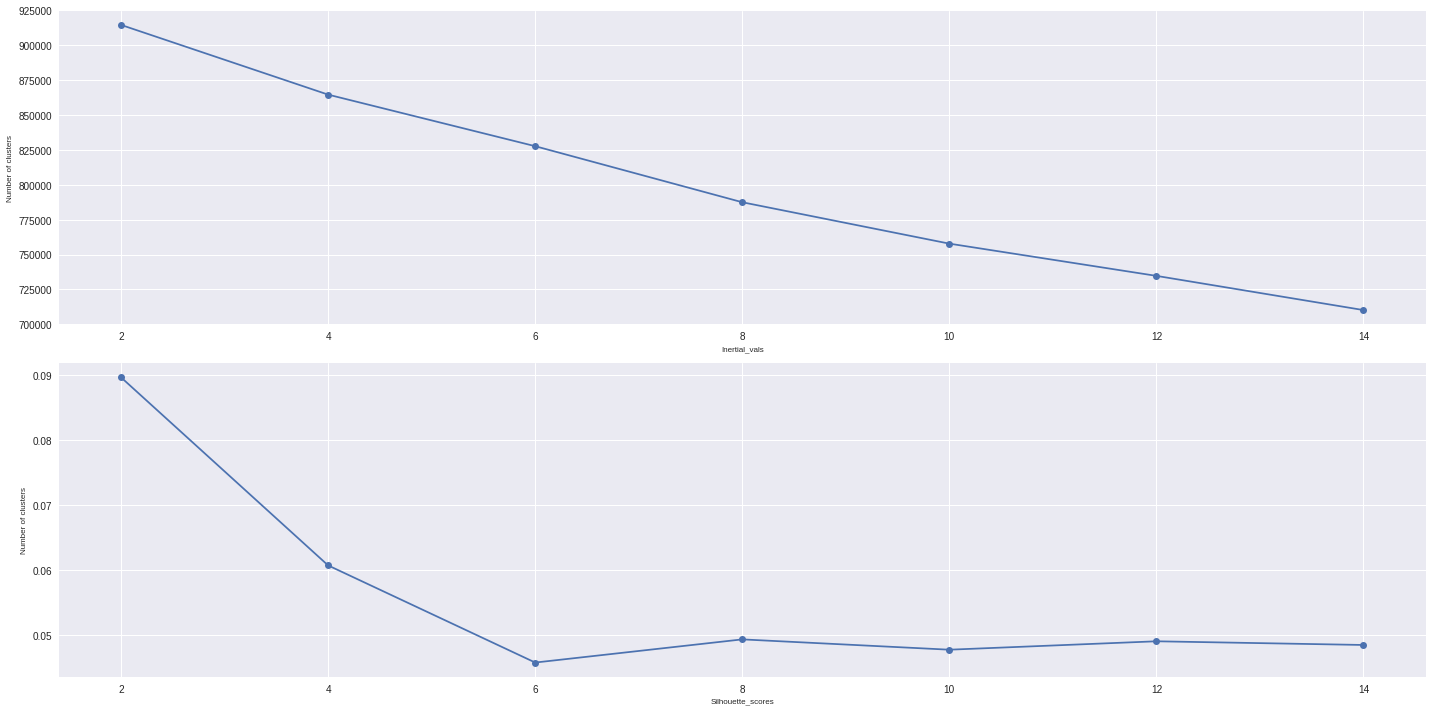

In [39]:
clustersAllInfo_standardised = ElbowEffectAndSilhouetteScore(preprocessed_df_standardised,  range(2,15,2))

Decision Making: Finally, could you detail - how the outcome of clustering analysis can
be used by decision makers?

In [40]:
!ls

 bbc.csv	      online_shoppers_intention.csv   web_log_data.csv
 IFN645.ipynb	      text-files-to-mine
'online retail.csv'   text-files-to-mine.zip


In [41]:
##### Text Mining

In [73]:
import glob

In [74]:
path = 'text-files-to-mine/*.txt'
files = glob.glob(path)

In [75]:
allText = []
for name in files:
    with open(name) as f:
        allText.append(f.read()) # .split("\n\n")

In [76]:
files[0]

'text-files-to-mine/072.txt'

In [77]:
allText[0]

'Henman & Murray claim LTA awards\n\nTim Henman was named player of the year for 2004 by the Lawn Tennis Association at Wimbledon on Monday.\n\nThe Briton was recognised for the best year of his career, which saw him reach the semis at the French and US Opens. Scotland\'s Andrew Murray was named young player of the year after winning the US Open juniors, as well as a Futures event in Italy. And world number one Peter Norfolk won disabled player of the year after claiming his third US Open crown.\n\nGreat Britain\'s under 14 boys won the team of the year prize for their victory at the World Junior Tennis event in August. Henman will start his 2005 campaign at the Kooyong event on 12 January in a field that includes Roger Federer, Andy Roddick and Andre Agassi. And the Briton is optimistic of surpassing his best effort of a fourth-round place at the Australian Open, which begins the following week. "I\'ve often felt that the conditions suit my game in Melbourne so I\'d love to be able to

In [78]:
import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

In [79]:
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

In [90]:
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [95]:
stopwords = sw.words('english')

In [97]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(allText)

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

36360


In [85]:
import nltk

In [104]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=7, random_state=rs).fit(X)

In [203]:
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster #{}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :num_word]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster #0: club, say, chelsea, want, liverpool, 
Top terms for cluster #1: open, 6, roddick, australian, win, 
Top terms for cluster #2: cricket, hamm, pakistan, team, india, 
Top terms for cluster #3: wale, england, bath, nation, six nation, 
Top terms for cluster #4: england, cricket, ball, south, day, 
Top terms for cluster #5: world, indoor, olympic, race, record, 
Top terms for cluster #6: ban, drug, athletics, greek, test, 


In [110]:
len(allText)

200

/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  return_n_iter=True)


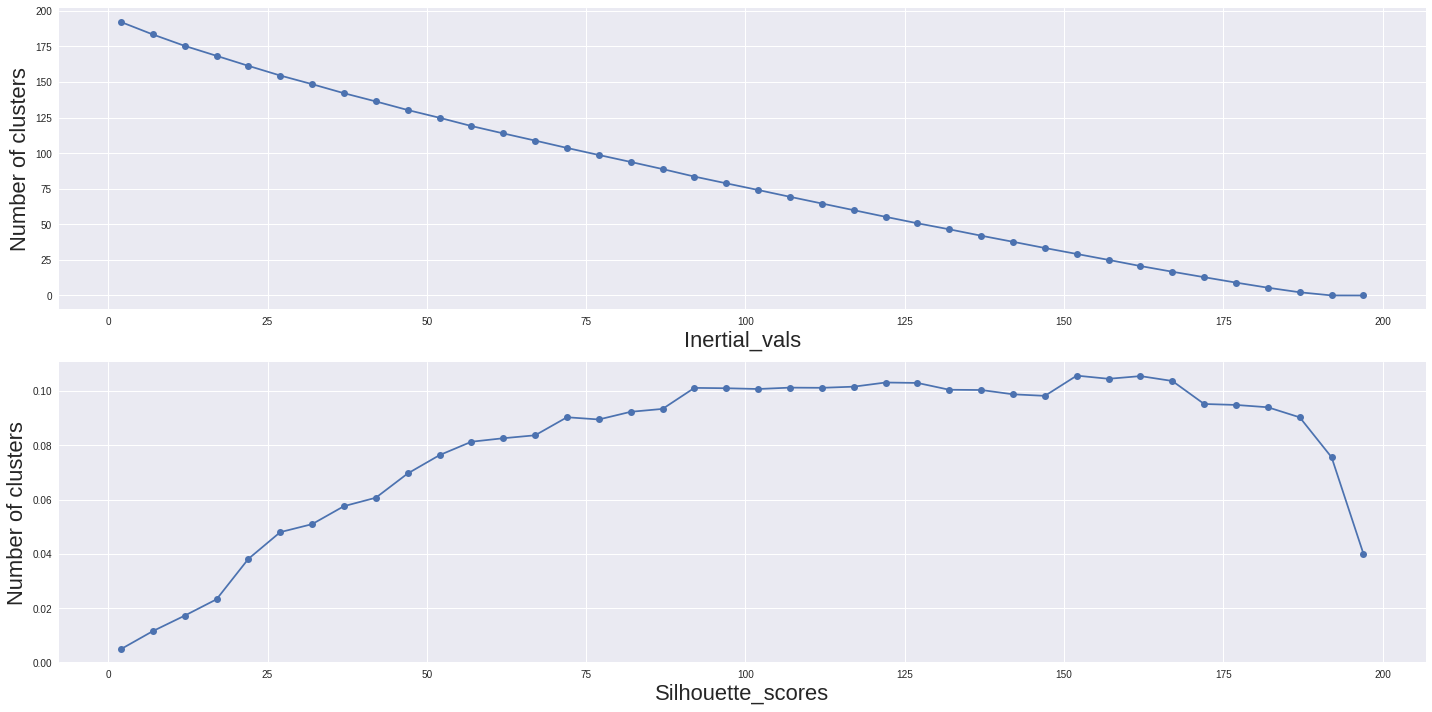

In [111]:
text_clusters = ElbowEffectAndSilhouetteScore(X, range(2,200, 5))

1. What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice.

The input is the tf-idf vetor, which has 36360 dimensions for each document.
Each token is consist of one or two words, which are unigram and bigram. The unigram token can provide the information of sigle word. And the bigram tokens can provide the information of phrses.


Q: Can you identify data quality issues in order to perform text mining?

In [123]:
#  What can be the data quality issue?

3. Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose. 

Should I select the one with the df and tf = 1? or the top df? So I can only find the term on the plot?

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(document_col)
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(allText)

In [129]:
class args(object):
    pass

In [135]:

terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True) # first rank the tf then df

In [169]:
terms

[{'term': 'say', 'idx': 27447, 'tf': 447, 'df': 168},
 {'term': 'year', 'idx': 36020, 'tf': 308, 'df': 134},
 {'term': 'game', 'idx': 13304, 'tf': 249, 'df': 106},
 {'term': 'win', 'idx': 35322, 'tf': 246, 'df': 102},
 {'term': 'play', 'idx': 23829, 'tf': 240, 'df': 104},
 {'term': 'one', 'idx': 22447, 'tf': 204, 'df': 104},
 {'term': 'go', 'idx': 14040, 'tf': 203, 'df': 112},
 {'term': 'take', 'idx': 31441, 'tf': 202, 'df': 112},
 {'term': 'england', 'idx': 10579, 'tf': 199, 'df': 52},
 {'term': 'two', 'idx': 33467, 'tf': 197, 'df': 103},
 {'term': 'time', 'idx': 32544, 'tf': 189, 'df': 115},
 {'term': 'first', 'idx': 12301, 'tf': 185, 'df': 89},
 {'term': 'world', 'idx': 35746, 'tf': 180, 'df': 92},
 {'term': 'get', 'idx': 13663, 'tf': 175, 'df': 87},
 {'term': 'player', 'idx': 23996, 'tf': 164, 'df': 82},
 {'term': 'make', 'idx': 19565, 'tf': 163, 'df': 108},
 {'term': 'would', 'idx': 35824, 'tf': 156, 'df': 93},
 {'term': 'back', 'idx': 3677, 'tf': 149, 'df': 85},
 {'term': 'come',

In [165]:
for t in reversed(terms):
    if (t['tf'] == 1 and t['df'] > 1):
        print(t)
        break

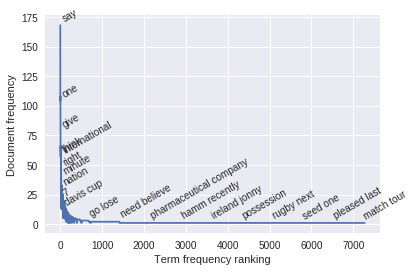

In [174]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
visualise_zipf(terms, 5)


In [168]:
terms

[{'term': 'say', 'idx': 27447, 'tf': 447, 'df': 168},
 {'term': 'year', 'idx': 36020, 'tf': 308, 'df': 134},
 {'term': 'game', 'idx': 13304, 'tf': 249, 'df': 106},
 {'term': 'win', 'idx': 35322, 'tf': 246, 'df': 102},
 {'term': 'play', 'idx': 23829, 'tf': 240, 'df': 104},
 {'term': 'one', 'idx': 22447, 'tf': 204, 'df': 104},
 {'term': 'go', 'idx': 14040, 'tf': 203, 'df': 112},
 {'term': 'take', 'idx': 31441, 'tf': 202, 'df': 112},
 {'term': 'england', 'idx': 10579, 'tf': 199, 'df': 52},
 {'term': 'two', 'idx': 33467, 'tf': 197, 'df': 103},
 {'term': 'time', 'idx': 32544, 'tf': 189, 'df': 115},
 {'term': 'first', 'idx': 12301, 'tf': 185, 'df': 89},
 {'term': 'world', 'idx': 35746, 'tf': 180, 'df': 92},
 {'term': 'get', 'idx': 13663, 'tf': 175, 'df': 87},
 {'term': 'player', 'idx': 23996, 'tf': 164, 'df': 82},
 {'term': 'make', 'idx': 19565, 'tf': 163, 'df': 108},
 {'term': 'would', 'idx': 35824, 'tf': 156, 'df': 93},
 {'term': 'back', 'idx': 3677, 'tf': 149, 'df': 85},
 {'term': 'come',

4. Did you disregard any frequent terms in addition to items automatically selected
by the Filter tool?

So.. except the filter args, we have to remove some terms as well? 

5. Justify the term weighting option selected. 

Firstly, we don't want the included term to appear in most of the documents since this term will not make an important role during clustering. Moreover, we don't want to include the terms that occur in only one ducuments, which will not be informative to tell the relationships with other documents.



6. What is the number of input features available to execute clustering? (Hint: how
the original text data is converted into a feature set that can be mined for
knowledge discovery?)

A: The filtered tf-idf vector only has 6914 dimensions. 


In [171]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.8)
X_filter = filter_vec.fit_transform(allText)

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

6914


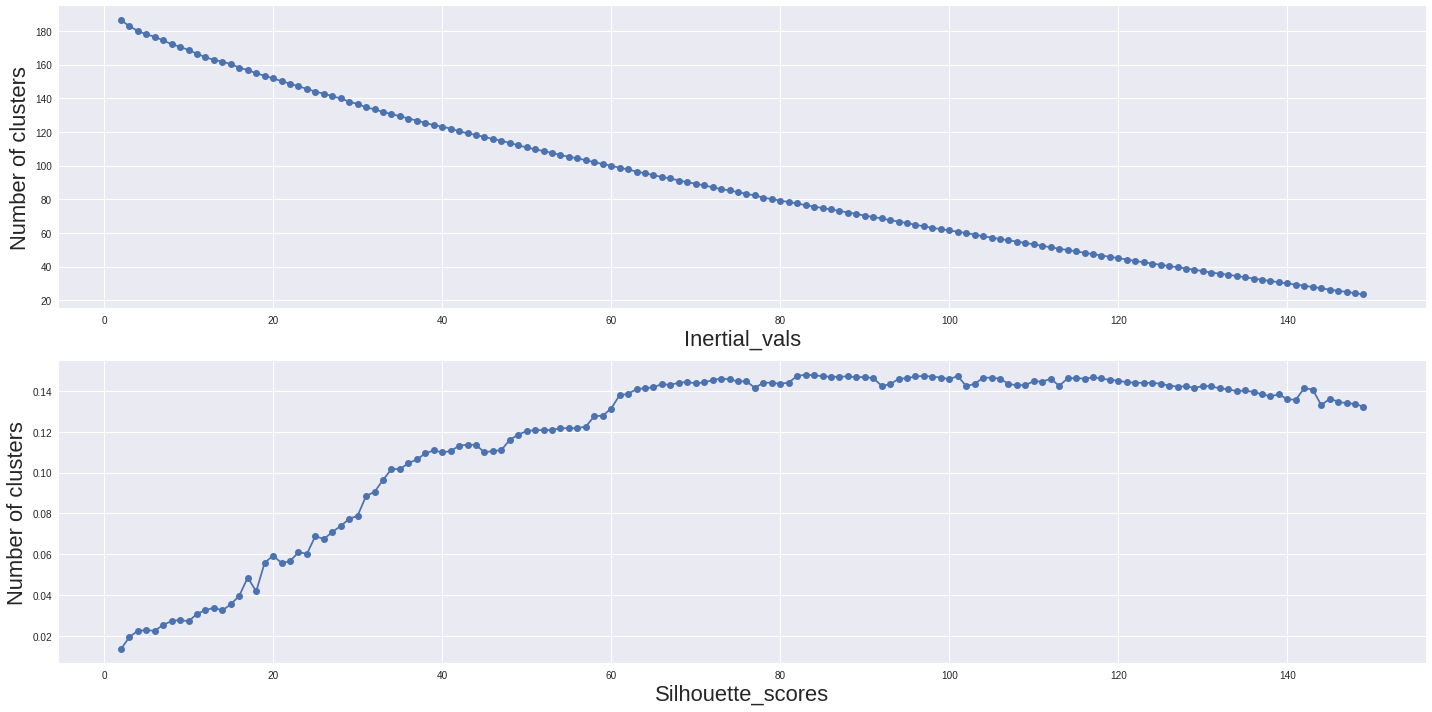

In [198]:
textFiltered_cluster = ElbowEffectAndSilhouetteScore(X_filter, range(2,150))

In [188]:
textFiltered_cluster[0].cluster_centers_.shape

(7, 6914)

In [195]:
visualise_text_cluster(textFiltered_cluster[0].n_clusters, textFiltered_cluster[0].cluster_centers_,filter_vec.get_feature_names(),30)

Top terms for cluster 0: club, player, liverpool, want, game, £, newcastle, manager, play, deal, go, would, year, benitez, ranger, celtic, tell, season, football, souness, bid, get, contract, chelsea, bos, add, farrell, gerrard, league, bath, 
Top terms for cluster 1: open, 6, roddick, australian, 7, australian open, hewitt, moya, win, year, federer, play, match, final, set, davis, davis cup, grand slam, 3, slam, cup, double, wimbledon, grand, first, beat, agassi, 7 6, event, nadal, 
Top terms for cluster 2: ball, england, south, wicket, day, vaughan, south africa, africa, test, run, strauss, four, cricket, trescothick, inning, one, catch, series, side, batsman, one day, first, two, boundary, kallis, strike, umpire, captain, stump, over, 
Top terms for cluster 3: england, wale, ireland, win, team, nation, game, rugby, play, six, cricket, six nation, half, cup, scotland, new zealand, zealand, side, pakistan, first, new, italy, back, beckham, coach, injury, get, france, player, wilkinson

7. State how many clusters are generated? Name each cluster meaningfully
according to the terms that appear in the clusters?







8. Identify the first fifteen high frequent terms (that are not stopwords or noise) in
the start list?




9. Describe how these clusters can be useful in the online personalised news story
service planned by the news corporation.

These clusters can help the news company to grouping their news automatically. Morever, the company can put two groups of news together when their clusters are closed since they pay provide similar information. Therefore, the reader can find the interesting news efficiently.





In [200]:
# For the question 8
terms[:10]

[{'term': 'say', 'idx': 27447, 'tf': 447, 'df': 168},
 {'term': 'year', 'idx': 36020, 'tf': 308, 'df': 134},
 {'term': 'game', 'idx': 13304, 'tf': 249, 'df': 106},
 {'term': 'win', 'idx': 35322, 'tf': 246, 'df': 102},
 {'term': 'play', 'idx': 23829, 'tf': 240, 'df': 104},
 {'term': 'one', 'idx': 22447, 'tf': 204, 'df': 104},
 {'term': 'go', 'idx': 14040, 'tf': 203, 'df': 112},
 {'term': 'take', 'idx': 31441, 'tf': 202, 'df': 112},
 {'term': 'england', 'idx': 10579, 'tf': 199, 'df': 52},
 {'term': 'two', 'idx': 33467, 'tf': 197, 'df': 103}]

In [201]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)


Each of the components produced by SVD contain weights associated with each word. The larger the weight is, the more connected the word is to the component.

In [205]:
visualise_text_cluster(10, svd.components_, filter_vec.get_feature_names())

Top terms for cluster #0: england, year, win, play, game, 
Top terms for cluster #1: 6, open, 7, roddick, moya, 
Top terms for cluster #2: athens, athletics, world, race, chepkemei, 
Top terms for cluster #3: test, wicket, ball, pakistan, run, 
Top terms for cluster #4: ireland, wale, england, nation, six nation, 
Top terms for cluster #5: greek, drug, kenteris, test, iaaf, 
Top terms for cluster #6: greek, arsenal, kenteris, drug, chelsea, 
Top terms for cluster #7: roddick, moya, england, davis cup, davis, 
Top terms for cluster #8: chepkemei, marathon, cross country, radcliffe, cross, 
Top terms for cluster #9: pakistan, moya, australia, cup, roddick, 


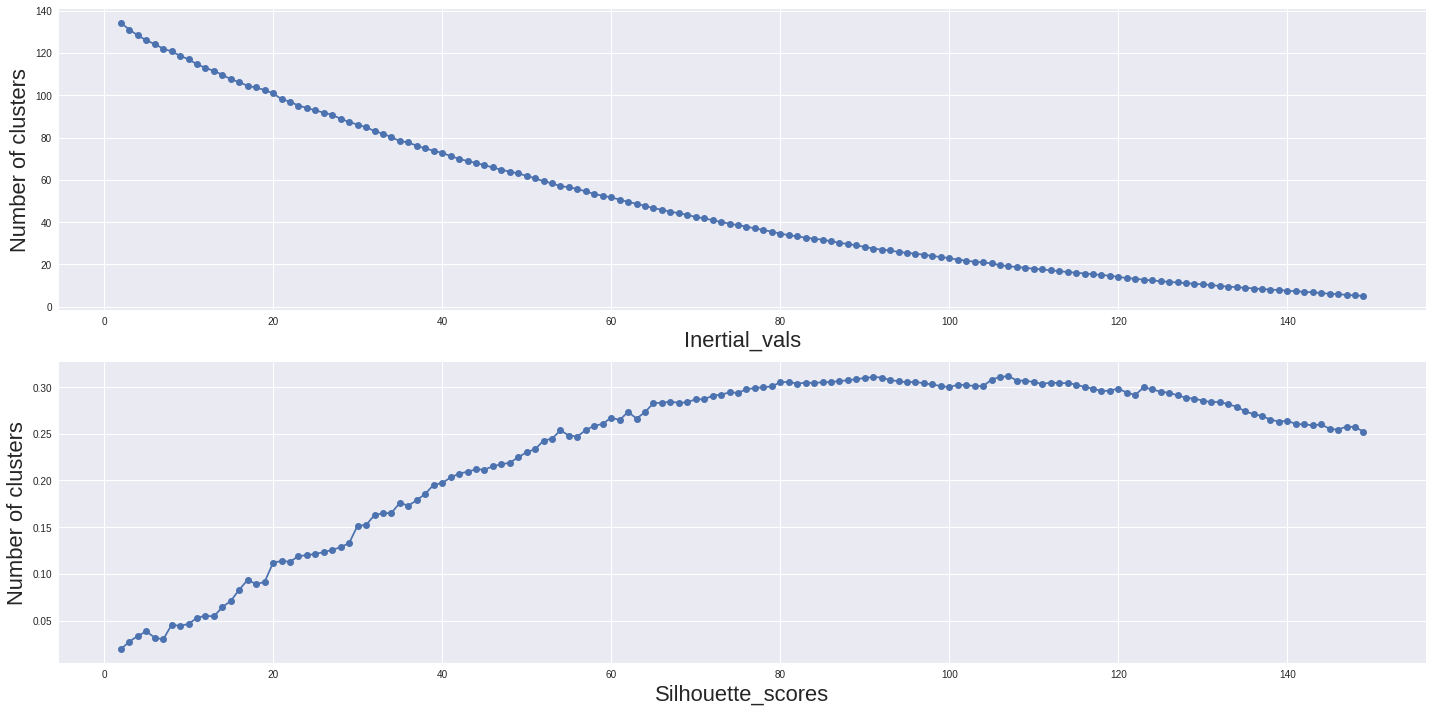

In [206]:
trans_cluster = ElbowEffectAndSilhouetteScore(X_trans, range(2,150))

In [213]:
trans_cluster[3]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [214]:
original_space_centroids = svd.inverse_transform(trans_cluster[3].cluster_centers_)
visualise_text_cluster(trans_cluster[3].n_clusters, original_space_centroids, filter_vec.get_feature_names())

Top terms for cluster #0: test, cricket, pakistan, day, ball, 
Top terms for cluster #1: race, world, year, indoor, olympic, 
Top terms for cluster #2: 6, open, roddick, 7, hewitt, 
Top terms for cluster #3: england, rugby, ireland, wale, nation, 
Top terms for cluster #4: club, player, game, chelsea, liverpool, 
